#**다변수 확률변수**
- 변수가 여러개일 때 분포를 알아보고 연관된 분포 혹은 결과값들을 알아봅시다.
- 변수가 여러개가 되면 확률분포가 결합되어 결합확률분포함수라고 합니다.
- 두 개의 확률변수 값의 결합확률분포를 알고 있을 때 두 개 중에 하나의 확률분포를 알고 있으면 나머지 하나의 확률분포도 알 수 있다.

### 이산 데이터

- X, Y의 확률질량함수
      X의 확률질량함수 = Px(x) 
      Y의 확률질량함수 = Px(y)
      결합확률질량함수 = Pxy(x,y)

In [ ]:
# 사전 라이브러리 불러오기
!pip install koreanize-matplotlib
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import koreanize_matplotlib
import string
import scipy as sp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 영어와 수학 학점

grades =['A','B','C','D','E','F']
scores = pd.DataFrame(
    [
        [1,2,1,0,0,0],
        [0,2,3,1,0,0],
        [0,4,7,4,1,0],
        [0,1,4,5,4,0],
        [0,0,1,3,2,0],
        [0,0,0,1,2,1]
    ],
    columns = grades, index=grades
)
scores.index.name = '수학'
scores.columns.name = '영어'
scores

영어,A,B,C,D,E,F
수학,,,,,,
A,1,2,1,0,0,0
B,0,2,3,1,0,0
C,0,4,7,4,1,0
D,0,1,4,5,4,0
E,0,0,1,3,2,0
F,0,0,0,1,2,1


In [ ]:
# 전체 학생 수
scores.values.sum()

50

In [ ]:
scores/scores.values.sum()

영어,A,B,C,D,E,F
수학,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


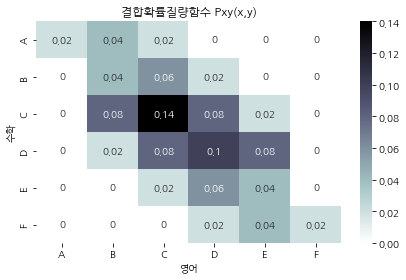

In [ ]:
# 결합확률질량함수 pmf
pmf = scores/scores.values.sum()

sns.heatmap(pmf, annot=True, cmap=mpl.cm.bone_r, xticklabels=grades, yticklabels=grades)
plt.title("결합확률질량함수 Pxy(x,y)")
plt.tight_layout()
plt.show()

#**주변확률질량함수**
결합확률질량함수에서 단변수 확률질량함수를 구하는 것
$${P_x}(x) = \Sigma {P_xy}(x,{y_i})$$
$${P_y}(y) = \Sigma {P_xy}({x_i},y)$$


In [ ]:
pmf

영어,A,B,C,D,E,F
수학,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


In [ ]:
# 단변수 '영어'에 대한 확률질량함수
print(pmf.sum())
x_english = pmf.sum()

영어
A    0.02
B    0.18
C    0.32
D    0.28
E    0.18
F    0.02
dtype: float64


In [ ]:
# 단변수 '수학'에 대한 확률질량함수
print(pmf.sum(axis=1))
y_math = pmf.sum(axis=1)[:,np.newaxis]

수학
A    0.08
B    0.12
C    0.32
D    0.28
E    0.12
F    0.08
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# **조건부 확률질량함수**

X, Y 변수 중 하나의 변수가 특정 값으로 고정되는 경우, 나머지 하나의 변수의 확률질량함수를 구하는 것


$$PX|Y(x|y)=\frac{PXY(x,y)}{PY(y)}$$

$$PY|X(y|x)=\frac{PXY(x,y)}{PX(x)}$$

In [ ]:
string.ascii_uppercase[:6]

'ABCDEF'

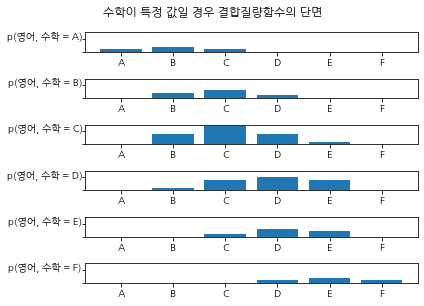

In [ ]:
grades =['A','B','C','D','E','F']

x = np.arange(6)
for i, y in enumerate(grades):
    ax = plt.subplot(6,1,i+1)
    ax.tick_params(labelleft=False)
    plt.bar(x,pmf.iloc[i,:])
    plt.ylabel(f'p(영어, 수학 = {y})',rotation=0, labelpad=40)
    plt.ylim(0,0.15)
    plt.xticks(range(6), grades)

plt.suptitle('수학이 특정 값일 경우 결합질량함수의 단면', y=1.05)
plt.tight_layout()
plt.show()

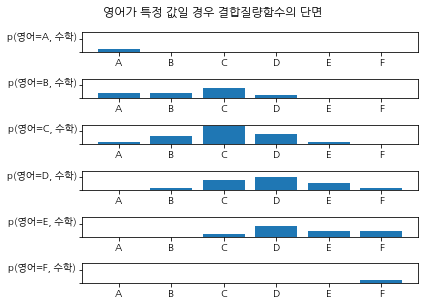

In [ ]:
grades =['A','B','C','D','E','F']

x = np.arange(6)
for i, y in enumerate(grades):
    ax = plt.subplot(6,1,i+1)
    ax.tick_params(labelleft=False)
    plt.bar(x,pmf[y])
    plt.ylabel(f'p(영어={y}, 수학)',rotation=0, labelpad=40)
    plt.ylim(0,0.15)
    plt.xticks(range(6), grades)

plt.suptitle('영어가 특정 값일 경우 결합질량함수의 단면', y=1.05)
plt.tight_layout()
plt.show()

# **다변수 연속확률변수**

# 결합누적확률분포함수
- 이산확률분포처럼 단순사건을 이용할 수 없음(A,B,C,D)
- 키, 몸무게, 속도, 시간, 온도 등 연속된 데이터에 대해서 적용
- CDF → 미분 → PDF(결합누적확률분포함수 → 미분 → 결합확률밀도함수)

$${F_{XY}} = P({X<x, Y<y})$$

- 특성
$${F_{XY}}(-∞, ∞) = 1$$

$${F_{XY}}(-∞, y) = {F_{XY}}(x, ∞) = 0$$




# 결합확률밀도함수
- 결합누적확률분포함수를 미분하여 정의
- 특성
    - 적분하면 1이 됨
$$ ∫∫{P_{XY}}(x,y)dxdy $$

In [ ]:
# 실습(키와 몸무게 평균값이 mu와 같다고 가정)
mu = [70,170]
cov = [
    [150,140],    # [분산, 공분산] --> 다분산 정규분포를 생성하기 위함
    [140,300]
]

'''
공분산 행렬 = [
    [분산,공분산],
    [공분산,분산]
]
'''
rv = sp.stats.multivariate_normal(mu,cov)
# dir(rv) # 기능 보여주는 dir

x, y = np.linspace(20,120,100), np.linspace(100,250,100)

In [ ]:
x

array([ 20.        ,  21.01010101,  22.02020202,  23.03030303,
        24.04040404,  25.05050505,  26.06060606,  27.07070707,
        28.08080808,  29.09090909,  30.1010101 ,  31.11111111,
        32.12121212,  33.13131313,  34.14141414,  35.15151515,
        36.16161616,  37.17171717,  38.18181818,  39.19191919,
        40.2020202 ,  41.21212121,  42.22222222,  43.23232323,
        44.24242424,  45.25252525,  46.26262626,  47.27272727,
        48.28282828,  49.29292929,  50.3030303 ,  51.31313131,
        52.32323232,  53.33333333,  54.34343434,  55.35353535,
        56.36363636,  57.37373737,  58.38383838,  59.39393939,
        60.4040404 ,  61.41414141,  62.42424242,  63.43434343,
        64.44444444,  65.45454545,  66.46464646,  67.47474747,
        68.48484848,  69.49494949,  70.50505051,  71.51515152,
        72.52525253,  73.53535354,  74.54545455,  75.55555556,
        76.56565657,  77.57575758,  78.58585859,  79.5959596 ,
        80.60606061,  81.61616162,  82.62626263,  83.63

In [ ]:
y

array([100.        , 101.51515152, 103.03030303, 104.54545455,
       106.06060606, 107.57575758, 109.09090909, 110.60606061,
       112.12121212, 113.63636364, 115.15151515, 116.66666667,
       118.18181818, 119.6969697 , 121.21212121, 122.72727273,
       124.24242424, 125.75757576, 127.27272727, 128.78787879,
       130.3030303 , 131.81818182, 133.33333333, 134.84848485,
       136.36363636, 137.87878788, 139.39393939, 140.90909091,
       142.42424242, 143.93939394, 145.45454545, 146.96969697,
       148.48484848, 150.        , 151.51515152, 153.03030303,
       154.54545455, 156.06060606, 157.57575758, 159.09090909,
       160.60606061, 162.12121212, 163.63636364, 165.15151515,
       166.66666667, 168.18181818, 169.6969697 , 171.21212121,
       172.72727273, 174.24242424, 175.75757576, 177.27272727,
       178.78787879, 180.3030303 , 181.81818182, 183.33333333,
       184.84848485, 186.36363636, 187.87878788, 189.39393939,
       190.90909091, 192.42424242, 193.93939394, 195.45

In [ ]:
xm,ym = np.meshgrid(x,y)
z = rv.pdf(np.dstack([xm,ym]))

In [ ]:
z

array([[4.80956464e-08, 5.87892243e-08, 7.09996294e-08, ...,
        5.91605555e-24, 2.24679741e-24, 8.43066779e-25],
       [5.88618862e-08, 7.25587289e-08, 8.83713615e-08, ...,
        1.64105394e-23, 6.28518486e-24, 2.37837124e-24],
       [7.10681108e-08, 8.83474034e-08, 1.08512357e-07, ...,
        4.49082007e-23, 1.73454025e-23, 6.61926091e-24],
       ...,
       [5.99937040e-27, 1.66211031e-26, 4.54967526e-26, ...,
        2.17854191e-08, 1.87525268e-08, 1.59485080e-08],
       [1.97113449e-27, 5.50723936e-27, 1.52026059e-26, ...,
        1.62232815e-08, 1.40830301e-08, 1.20786918e-08],
       [6.38909029e-28, 1.80019789e-27, 5.01150145e-27, ...,
        1.19185570e-08, 1.04338505e-08, 9.02468243e-09]])

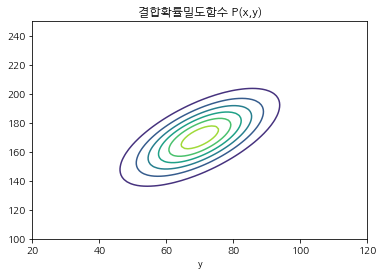

In [ ]:
plt.contour(x,y,z)
plt.xlabel('x')
plt.xlabel('y')
plt.title('결합확률밀도함수 P(x,y)')
plt.show()

# 주변확률밀도함수
- 주변확률밀도함수는 하나의 변수를 가중평균 하고 나머지 하나의 변수에 대해서 확률밀도함수를 구하는 것
- 주변확률밀도함수는 결합확률밀도함수를 통해 단일변수의 확률밀도함수를 구하는 것
$${P_X}(x) = ∫{P_{XY}}(x,y)dy$$
$${P_Y}(y) = ∫{P_{XY}}(x,y)dx$$


In [ ]:
mu = [70, 170] # 몸무게, 키
cov = [
    [150, 140],
    [140, 300]
]

x = np.linspace(20,120,100)
y = np.linspace(100,250,100)

xm, ym = np.meshgrid(x, y)
rv = sp.stats.multivariate_normal(mu, cov)
z = rv.pdf(np.dstack([xm, ym]))

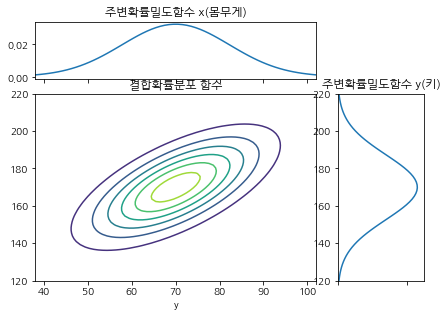

In [ ]:
fx = [simps(z1, y) for z1 in z.T]
fy = [simps(z1, x) for z1 in z]

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.xaxis.set_major_formatter(NullFormatter())

ax1.contour(xm, ym, z)
ax1.set_title('결합확률분포 함수')
ax1.set_xlabel('x')
ax1.set_xlabel('y')

ax2.plot(x, fx)
ax2.set_title('주변확률밀도함수 x(몸무게)')

base = ax3.transData
rot = transforms.Affine2D().rotate_deg(-90)
plt.plot(-y, fy, transform=rot+base)
plt.title('주변확률밀도함수 y(키)')

ax1.set_xlim(38, 102)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.025)

ax1.set_ylim(120, 220)
ax3.set_ylim(120, 220)

plt.show()

# 조건부 확률밀도함수
다변수 확률변수 중에 하나가 특정한 값일 경우, 나머지 확률밀도함수를 조건부확률밀도함수라고 함

$${P_{X|Y}}(x|y)=\frac{P_{XY}(x,y)}{PY(y)}$$

$${P_{Y|X}}(y|x)=\frac{P_{XY}(x,y)}{PX(x)}$$

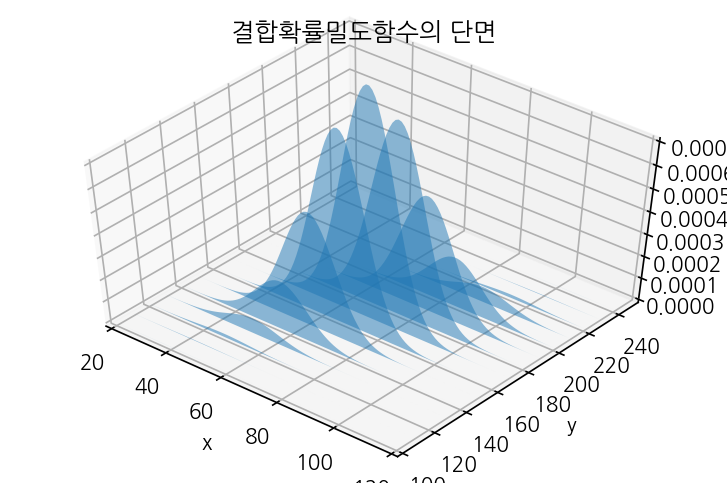

In [ ]:
mu = [70, 170] # 몸무게, 키
cov = [
    [150, 140],
    [140, 300]
]

x = np.linspace(20,120,100)
y = np.linspace(100,250,16)

xm, ym = np.meshgrid(x, y)
rv = sp.stats.multivariate_normal(mu, cov)
z = rv.pdf(np.dstack([xm, ym])) # Probability Density Function = pdf = 확률밀도함수

fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

xs = np.hstack([0,x,0])
zs = np.zeros_like(xs)
verts = []

for i,y1 in enumerate(y):
    zs[1:-1] = z[i]
    verts.append(list(zip(x,zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly,zs=y,zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20,120)
ax.set_ylim(100,250)
ax.set_zlim3d(0,0.0007)
ax.view_init(50,-50)
plt.title('결합확률밀도함수의 단면')
plt.show()

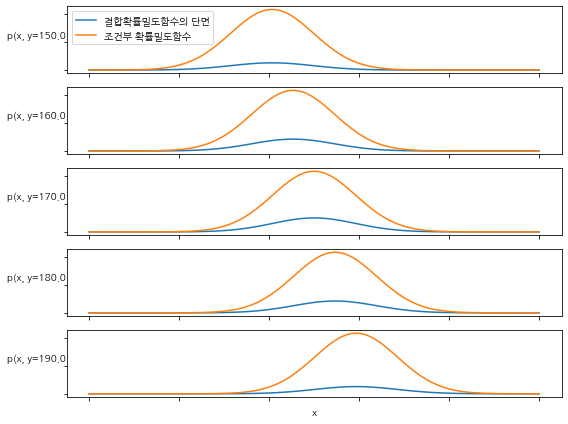

In [ ]:
mu = [70, 170] # 몸무게, 키
cov = [
    [150, 140],
    [140, 300]
]

n = 10
x = np.linspace(20, 120, 100)
y = np.linspace(100, 250, 16)

xm, ym = np.meshgrid(x, y)
rv = sp.stats.multivariate_normal(mu, cov)
z = rv.pdf(np.dstack([xm, ym]))

plt.figure(figsize=(8,6))

for i, j in enumerate(range(5, 10)):
  ax = plt.subplot(5, 1, i+1)
  ax.tick_params(labelleft=False)
  plt.plot(x, z[j,:] * 10, label='결합확률밀도함수의 단면')
  density = simps(z[j,:], x)
  plt.plot(x, z[j,:]/density, label='조건부 확률밀도함수')
  ax.xaxis.set_ticklabels([])
  plt.ylabel(f'p(x, y={y[j]}', rotation=0, labelpad=30)
  if i == 0:
    plt.legend(loc=2)
plt.xlabel('x')
plt.tight_layout()
plt.show()

## 독립
표본 값이 달라질 때 다른 확률 변수의 조건부 분포가 달라질 때 상관관계가 있다.   
두 확률변수가 상관관계 아니면 서로 독립

$${P_{XY}}(x,y) = {P_X}(x){P_Y}(y)$$

### 조건부 확률분포
독립인 X,Y의 조건부 확률밀도함수는 주변확률밀도함수와 같다.

$${P_{X|Y}}(x|y) = \frac{{P_X}(x){P_Y}(y)}{P_Y(y)} = {P_X(x)}$$
$${P_{Y|X}}(y|x) = \frac{{P_X}(x){P_Y}(y)}{P_X(x)} = {P_Y(y)}$$

In [ ]:
# 이상변수에 대한 예제
pmf1 = np.array(
    [
     [1,2,4,2,1],
     [2,4,8,4,2],
     [4,8,16,8,4],
     [2,4,8,4,2],
     [1,2,4,2,1]
    ]
)
pmf1 = pmf1 / pmf1.sum()

In [ ]:
pmf1

array([[0.01, 0.02, 0.04, 0.02, 0.01],
       [0.02, 0.04, 0.08, 0.04, 0.02],
       [0.04, 0.08, 0.16, 0.08, 0.04],
       [0.02, 0.04, 0.08, 0.04, 0.02],
       [0.01, 0.02, 0.04, 0.02, 0.01]])

In [ ]:
pmf_x = pmf1.sum(axis=0)
pmf_y = pmf1.sum(axis=1)

In [ ]:
pmf_x

array([0.1, 0.2, 0.4, 0.2, 0.1])

In [ ]:
pmf_y

array([0.1, 0.2, 0.4, 0.2, 0.1])

In [ ]:
pmf1x = pmf_x * pmf_y[:,np.newaxis]

In [ ]:
pmf1x

array([[0.01, 0.02, 0.04, 0.02, 0.01],
       [0.02, 0.04, 0.08, 0.04, 0.02],
       [0.04, 0.08, 0.16, 0.08, 0.04],
       [0.02, 0.04, 0.08, 0.04, 0.02],
       [0.01, 0.02, 0.04, 0.02, 0.01]])

Text(0.5, 1.0, '독립인 두 변수의 주변확률질량함수의 곱')

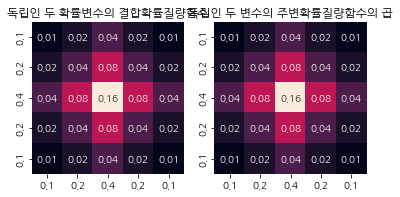

In [ ]:
plt.subplot(121)
sns.heatmap(pmf1,annot=True,square=True,cbar=False, xticklabels=pmf_x,
            yticklabels=pmf_y)
plt.title('독립인 두 확률변수의 결합확률질량함수')

plt.subplot(122)
sns.heatmap(pmf1x,annot=True,square=True,cbar=False, xticklabels=pmf_x,
            yticklabels=pmf_y)
plt.title('독립인 두 변수의 주변확률질량함수의 곱')

In [ ]:
pmf1[1,:]/pmf_y[1]

array([0.1, 0.2, 0.4, 0.2, 0.1])

# 상관관계가 있는 두 확률변수

Text(0.5, 1.0, '상관관계가 있는 두 변수의 주변확률질량함수의 곱')

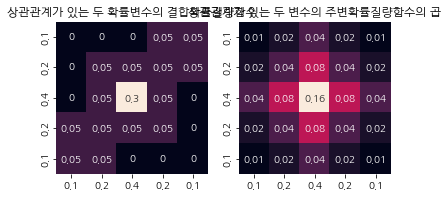

In [ ]:
pmf2 = np.array([
    [0,0,0,5,5],
    [0,5,5,5,5],
    [0,5,30,5,0],
    [5,5,5,5,0],
    [5,5,0,0,0]
])
pmf2 = pmf2 / pmf2.sum()
pmf2_x = pmf2.sum(axis=0)
pmf2_y = pmf2.sum(axis=1)
pmf2x = pmf2_x * pmf2_y[:,np.newaxis]

plt.subplot(121)
sns.heatmap(pmf2,annot=True,square=True,cbar=False, xticklabels=pmf2_x.round(2),
            yticklabels=pmf2_y.round(2))
plt.title('상관관계가 있는 두 확률변수의 결합확률질량함수')

plt.subplot(122)
sns.heatmap(pmf2x,annot=True,square=True,cbar=False, xticklabels=pmf2_x.round(2),
            yticklabels=pmf2_y.round(2))
plt.title('상관관계가 있는 두 변수의 주변확률질량함수의 곱')

In [ ]:
for i in range(len(pmf1)):
    print(pmf1[i,:]/pmf_y[1])

[0.05 0.1  0.2  0.1  0.05]
[0.1 0.2 0.4 0.2 0.1]
[0.2 0.4 0.8 0.4 0.2]
[0.1 0.2 0.4 0.2 0.1]
[0.05 0.1  0.2  0.1  0.05]


In [ ]:
for i in range(len(pmf2)):
    print(pmf2[i,:]/pmf2_y[1])

[0.   0.   0.   0.25 0.25]
[0.   0.25 0.25 0.25 0.25]
[0.   0.25 1.5  0.25 0.  ]
[0.25 0.25 0.25 0.25 0.  ]
[0.25 0.25 0.   0.   0.  ]
